# Exploratory Data Analysis: Nigerian Retail Transactions

## Dataset Description

This dataset contains **Nigerian retail and POS (Point of Sale) transaction data** from various merchants across different states in Nigeria. The data captures financial transactions made through multiple channels including POS terminals, ATMs, and mobile banking platforms.

### Key Features:
- **Transaction Details**: Unique transaction IDs, timestamps, and amounts in Nigerian Naira (NGN)
- **Customer Information**: Account IDs and customer IDs for tracking customer behavior
- **Financial Data**: Balance before and after each transaction, transaction types (credit/debit)
- **Channel Information**: Transaction channels (POS, ATM, Mobile)
- **Merchant Details**: Merchant names and category codes (MCC)
- **Geographic Data**: Location by Local Government Area (LGA) and State
- **Security**: Transaction status and fraud flags for monitoring suspicious activities

### Business Context:
This dataset is valuable for understanding:
- Consumer spending patterns across Nigeria
- Popular merchant categories and channels
- Regional transaction behaviors
- Fraud detection and prevention
- Financial inclusion insights

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('nigerian_retail_transactions_full_sample.csv')

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nFirst few records:")
df.head()

Dataset Shape: 100 rows × 16 columns

First few records:


,transaction_id,account_id,customer_id,timestamp,amount_ngn,balance_before_ngn,balance_after_ngn,transaction_type,channel,merchant_category_code,merchant_name,location_lga,location_state,device_id,status,fraud_flag
0,736fb3c1-1ef3-4c5f-9fa7-f346e165a841,ACC-00039963,CUS-00039963,2024-04-07 09:04:00,"30,700.00","229,238.93","259,938.93",credit,pos,"5,541.00",Total,Lagos LGA,Lagos,NaN,success,False
1,093a236b-e8c7-4f6a-b94d-49af723e298a,ACC-00001191,CUS-00001191,2023-07-25 21:45:00,"16,500.00","432,585.18","416,085.18",debit,atm,NaN,NaN,Lagos LGA,Lagos,NaN,success,False
2,a9c32d27-4a1c-48e3-a49d-d4b839ca3019,ACC-00014476,CUS-00014476,2023-03-04 10:13:00,"209,500.00","62,828.09","272,328.09",credit,pos,"4,900.00",PHEDC,Oyo LGA,Oyo,NaN,success,False
3,e688319c-68e9-4f86-866e-9ca201c895f9,ACC-00007044,CUS-00007044,2024-11-25 15:10:00,"1,321,000.00","107,314.69",0.00,debit,mobile,NaN,NaN,Lagos LGA,Lagos,DEV-2ae90c0d4e814fbf,success,False
4,001f38d6-53c0-4c2b-a582-d9b846a97ed0,ACC-00009913,CUS-00009913,2024-02-17 15:50:00,"18,800.00","517,464.89","498,664.89",debit,mobile,NaN,NaN,Lagos LGA,Lagos,DEV-0c25a2623d274351,success,False


In [3]:
# Dataset information
print("Dataset Information:")
print("=" * 60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          100 non-null    object 
 1   account_id              100 non-null    object 
 2   customer_id             100 non-null    object 
 3   timestamp               100 non-null    object 
 4   amount_ngn              100 non-null    float64
 5   balance_before_ngn      100 non-null    float64
 6   balance_after_ngn       100 non-null    float64
 7   transaction_type        100 non-null    object 
 8   channel                 100 non-null    object 
 9   merchant_category_code  42 non-null     float64
 10  merchant_name           42 non-null     object 
 11  location_lga            100 non-null    object 
 12  location_state          100 non-null    object 
 13  device_id               46 non-null     object 
 14  status                

In [4]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 60)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
                        Missing Count  Percentage
merchant_category_code             58       58.00
merchant_name                      58       58.00
device_id                          54       54.00


## 2. Data Preprocessing and Feature Engineering

In [5]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract temporal features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month_name'] = df['timestamp'].dt.month_name()

# Convert boolean columns
df['fraud_flag'] = df['fraud_flag'].astype(bool)

print("Data preprocessing completed!")
print(f"\nDate range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total unique customers: {df['customer_id'].nunique():,}")
print(f"Total unique merchants: {df['merchant_name'].nunique():,}")

Data preprocessing completed!

Date range: 2023-01-06 15:42:00 to 2024-12-25 13:36:00
Total unique customers: 92
Total unique merchants: 25


## 3. Statistical Summary

In [6]:
# Statistical summary of numerical columns
print("Numerical Features Summary:")
print("=" * 80)
df[['amount_ngn', 'balance_before_ngn', 'balance_after_ngn']].describe()

Numerical Features Summary:


,amount_ngn,balance_before_ngn,balance_after_ngn
count,100.00,100.00,100.00
mean,"70,162.00","313,287.77","301,392.27"
std,"189,039.01","307,190.12","326,800.55"
min,100.00,"15,019.42",0.00
25%,"3,425.00","105,306.51","78,600.62"
50%,"11,600.00","225,692.83","234,502.24"
75%,"38,500.00","412,097.95","395,008.74"
max,"1,321,000.00","1,386,513.87","1,574,592.75"


## 4. Data Visualizations

### 4.1 Transaction Amount Distribution

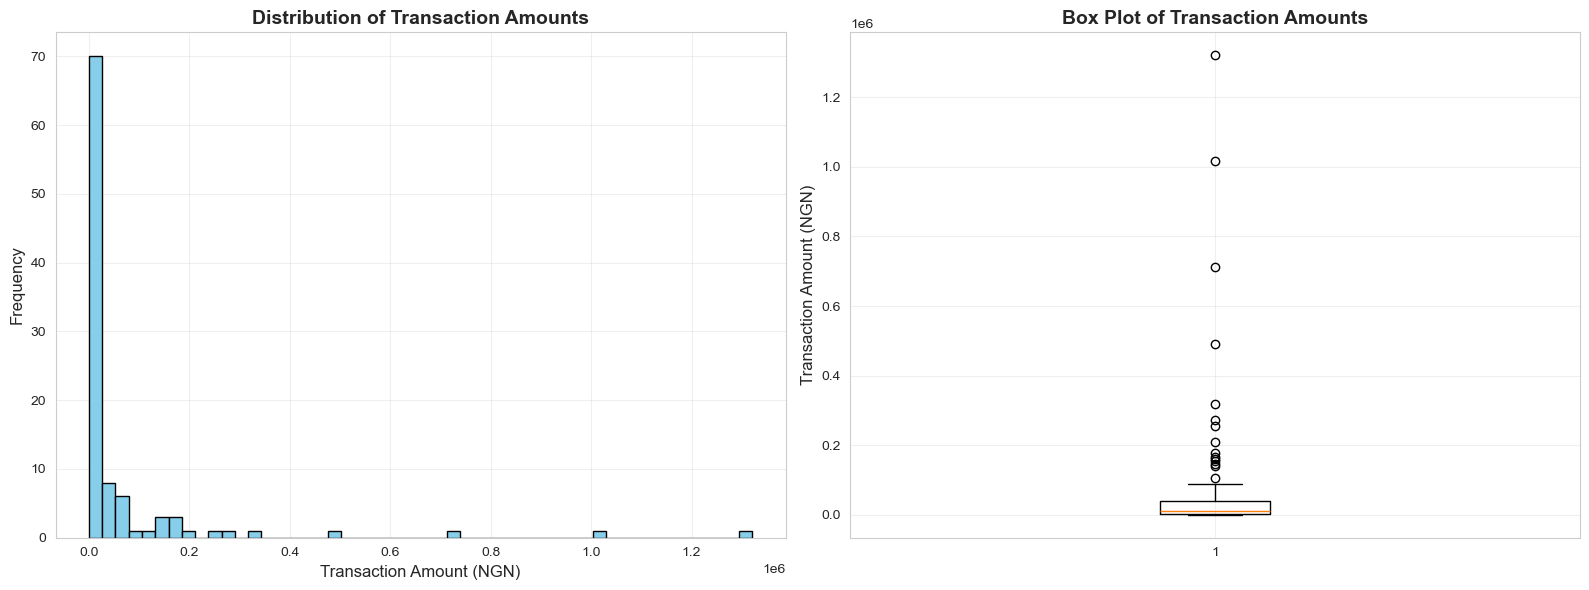

Mean transaction amount: ₦70,162.00
Median transaction amount: ₦11,600.00
Most common transaction range: ₦1,200.00


In [7]:
# Distribution of transaction amounts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['amount_ngn'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Transaction Amount (NGN)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Transaction Amounts', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['amount_ngn'], vert=True)
axes[1].set_ylabel('Transaction Amount (NGN)', fontsize=12)
axes[1].set_title('Box Plot of Transaction Amounts', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean transaction amount: ₦{df['amount_ngn'].mean():,.2f}")
print(f"Median transaction amount: ₦{df['amount_ngn'].median():,.2f}")
print(f"Most common transaction range: ₦{df['amount_ngn'].mode()[0]:,.2f}")

**Explanation:**
- The histogram shows that most transactions are concentrated at lower amounts, with a right-skewed distribution indicating that high-value transactions are less common
- The box plot reveals potential outliers in transaction amounts, suggesting some very high-value transactions
- This pattern is typical in retail environments where most purchases are everyday items with occasional big-ticket purchases

### 4.2 Transaction Types (Credit vs Debit)

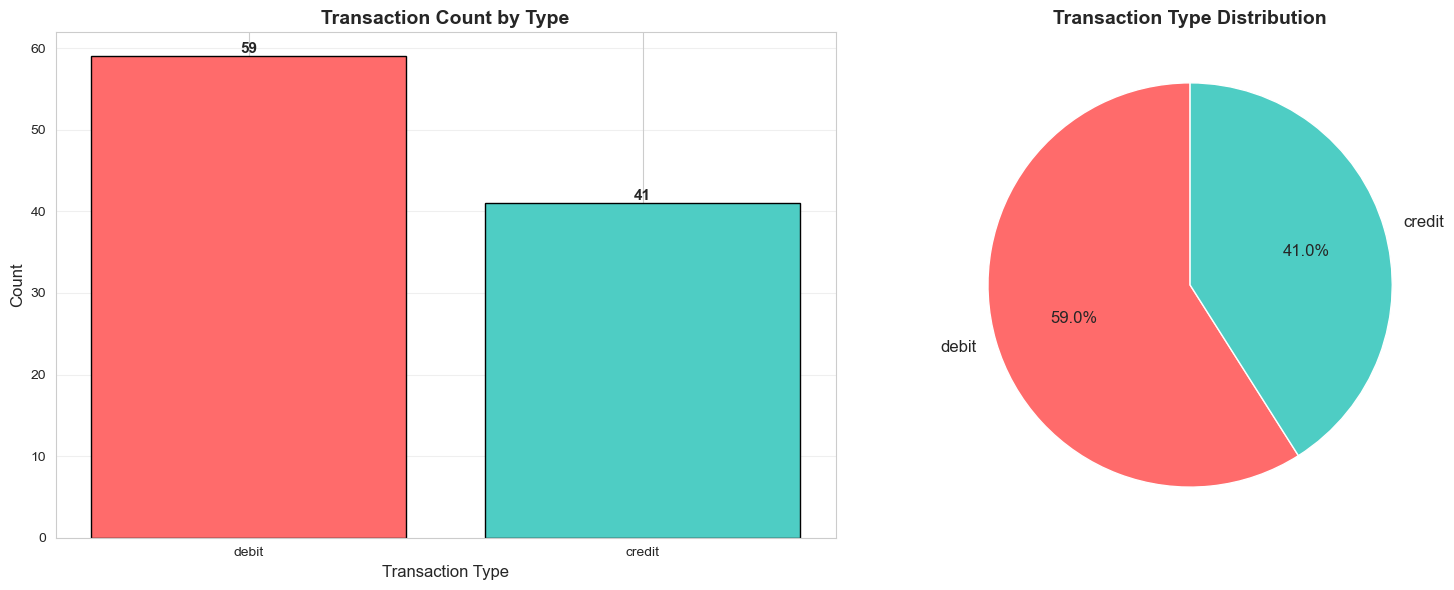


Transaction Type Summary:
transaction_type
debit     59
credit    41
Name: count, dtype: int64


In [8]:
# Transaction type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
transaction_counts = df['transaction_type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
axes[0].bar(transaction_counts.index, transaction_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Transaction Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Transaction Count by Type', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(transaction_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(transaction_counts.values, labels=transaction_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Transaction Type Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTransaction Type Summary:")
print(transaction_counts)

**Explanation:**
- The visualization shows the proportion of credit (money in) vs debit (money out) transactions
- This helps understand customer behavior patterns - whether the platform is primarily used for receiving payments or making purchases
- A balanced distribution might indicate healthy account activity with both income and expenses flowing through the system

### 4.3 Transaction Channels

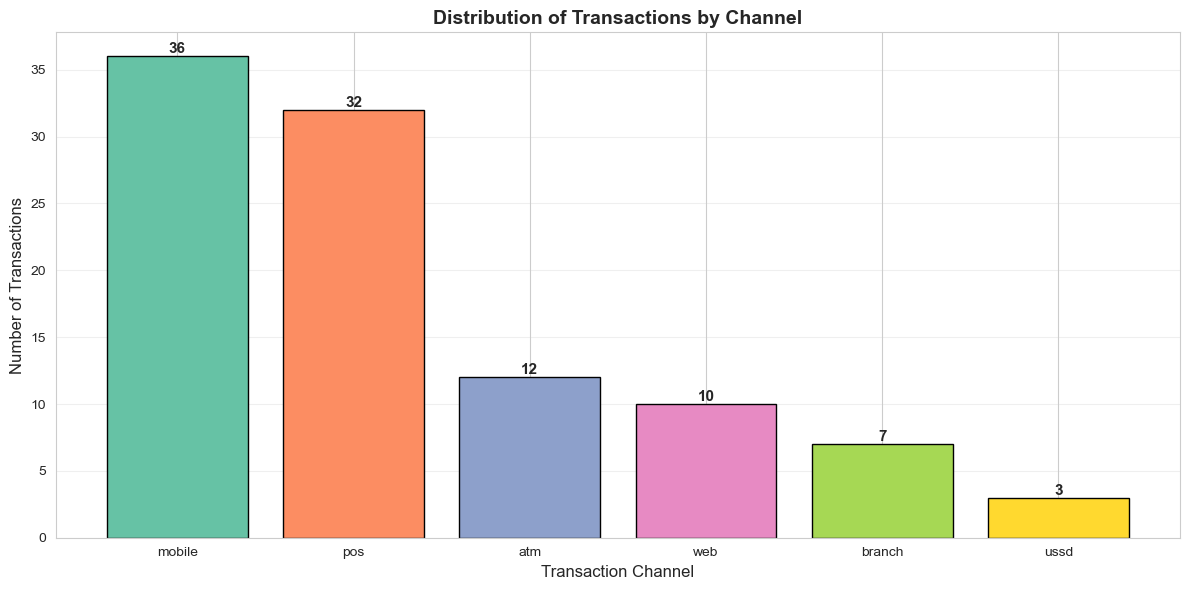


Channel Usage Statistics:
MOBILE: 36 transactions (36.0%)
POS: 32 transactions (32.0%)
ATM: 12 transactions (12.0%)
WEB: 10 transactions (10.0%)
BRANCH: 7 transactions (7.0%)
USSD: 3 transactions (3.0%)


In [9]:
# Transaction channel distribution
plt.figure(figsize=(12, 6))

channel_counts = df['channel'].value_counts()
colors_palette = sns.color_palette("Set2", len(channel_counts))

bars = plt.bar(channel_counts.index, channel_counts.values, color=colors_palette, edgecolor='black')
plt.xlabel('Transaction Channel', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Distribution of Transactions by Channel', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print channel statistics
print("\nChannel Usage Statistics:")
print("=" * 60)
for channel, count in channel_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{channel.upper()}: {count:,} transactions ({percentage:.1f}%)")

**Explanation:**
- This chart reveals which transaction channels (POS, ATM, Mobile) are most popular among customers
- Understanding channel preferences helps businesses optimize infrastructure investment and improve service delivery
- Growing mobile usage might indicate a shift toward digital banking, while POS dominance could suggest strong retail merchant partnerships

### 4.4 Geographic Distribution (Top States)

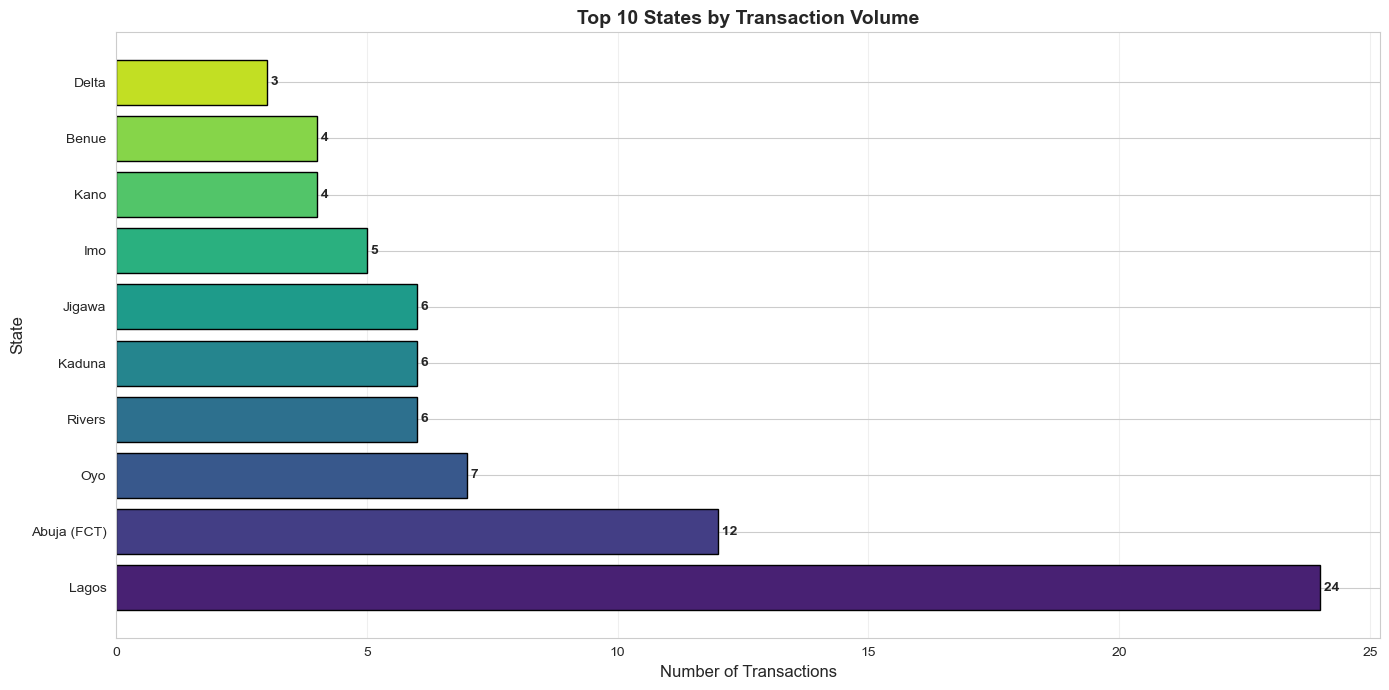


Top 10 States by Transaction Count:
location_state
Lagos          24
Abuja (FCT)    12
Oyo             7
Rivers          6
Kaduna          6
Jigawa          6
Imo             5
Kano            4
Benue           4
Delta           3
Name: count, dtype: int64


In [10]:
# Top 10 states by transaction volume
plt.figure(figsize=(14, 7))

top_states = df['location_state'].value_counts().head(10)
colors = sns.color_palette("viridis", len(top_states))

bars = plt.barh(top_states.index, top_states.values, color=colors, edgecolor='black')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Top 10 States by Transaction Volume', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_states.values)):
    plt.text(value, bar.get_y() + bar.get_height()/2,
             f' {value:,}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 10 States by Transaction Count:")
print("=" * 60)
print(top_states)

**Explanation:**
- This horizontal bar chart displays which Nigerian states have the highest transaction volumes
- Lagos, being the commercial hub of Nigeria, likely dominates transaction activity
- Understanding geographic distribution helps in:
  - Regional market penetration strategies
  - Infrastructure planning and resource allocation
  - Identifying underserved markets with growth potential

### 4.5 Top Merchants

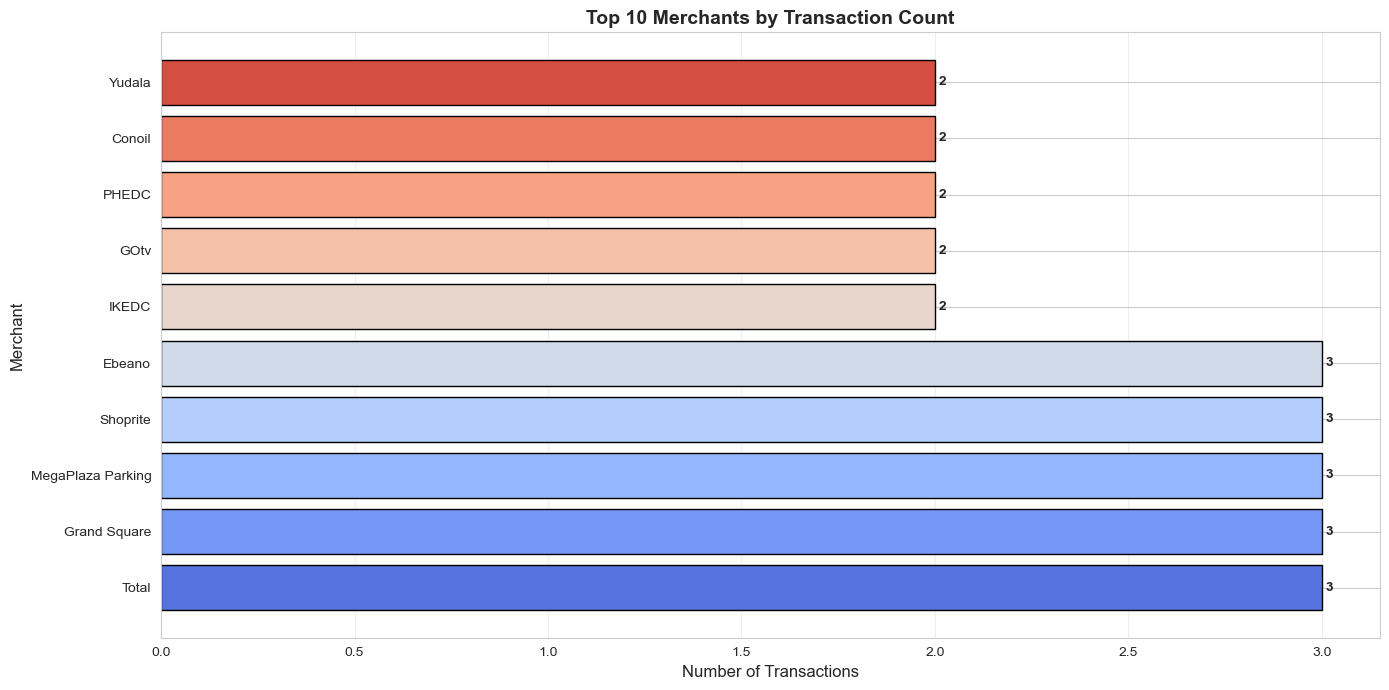


Top 10 Merchants:
merchant_name
Total                3
Grand Square         3
MegaPlaza Parking    3
Shoprite             3
Ebeano               3
IKEDC                2
GOtv                 2
PHEDC                2
Conoil               2
Yudala               2
Name: count, dtype: int64


Top Merchants by Total Revenue:
Chicken Republic: ₦713,700.00
Conoil: ₦493,400.00
PHEDC: ₦262,400.00
Ebeano: ₦214,300.00
Mama Cass: ₦178,400.00
Grand Square: ₦132,100.00
Startimes: ₦68,400.00
Shoprite: ₦60,400.00
MegaPlaza Parking: ₦43,400.00
Total: ₦34,100.00


In [11]:
# Top merchants by transaction count
plt.figure(figsize=(14, 7))

# Filter out NaN values
top_merchants = df['merchant_name'].dropna().value_counts().head(10)

if len(top_merchants) > 0:
    colors = sns.color_palette("coolwarm", len(top_merchants))
    bars = plt.barh(top_merchants.index, top_merchants.values, color=colors, edgecolor='black')
    plt.xlabel('Number of Transactions', fontsize=12)
    plt.ylabel('Merchant', fontsize=12)
    plt.title('Top 10 Merchants by Transaction Count', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3, axis='x')
    
    # Add value labels
    for bar, value in zip(bars, top_merchants.values):
        plt.text(value, bar.get_y() + bar.get_height()/2,
                 f' {value:,}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Merchants:")
    print("=" * 60)
    print(top_merchants)
else:
    print("No merchant data available for visualization")

# Total revenue by merchant
print("\n\nTop Merchants by Total Revenue:")
print("=" * 60)
merchant_revenue = df[df['merchant_name'].notna()].groupby('merchant_name')['amount_ngn'].sum().sort_values(ascending=False).head(10)
for merchant, revenue in merchant_revenue.items():
    print(f"{merchant}: ₦{revenue:,.2f}")

**Explanation:**
- Identifies the most frequently used merchants in the dataset
- Revenue analysis shows which merchants generate the highest transaction volumes in terms of amount
- This information is valuable for:
  - Identifying key business partners
  - Understanding customer shopping preferences
  - Negotiating merchant partnerships and commission structures

### 4.6 Transaction Trends Over Time

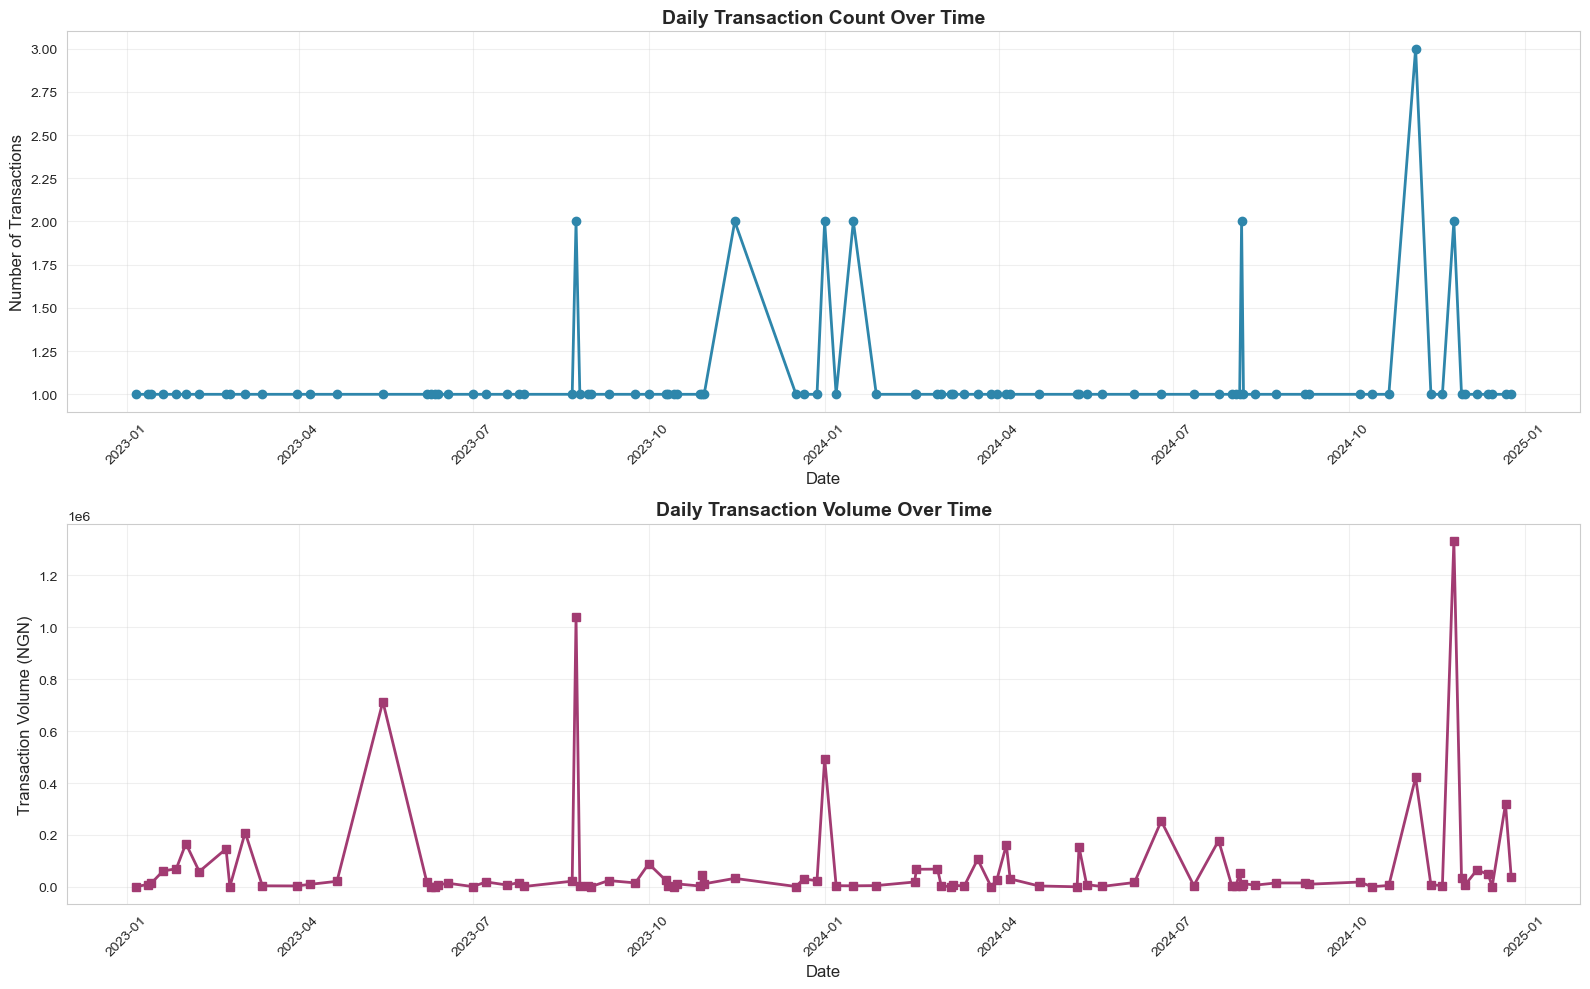

Peak transaction day: 2024-11-05 with 3 transactions
Highest volume day: 2024-11-25 with ₦1,332,200.00


In [12]:
# Transactions over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Daily transaction count
daily_transactions = df.groupby(df['timestamp'].dt.date).size()
axes[0].plot(daily_transactions.index, daily_transactions.values, marker='o', linestyle='-', 
             color='#2E86AB', linewidth=2, markersize=6)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].set_title('Daily Transaction Count Over Time', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Daily transaction volume (amount)
daily_volume = df.groupby(df['timestamp'].dt.date)['amount_ngn'].sum()
axes[1].plot(daily_volume.index, daily_volume.values, marker='s', linestyle='-', 
             color='#A23B72', linewidth=2, markersize=6)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Transaction Volume (NGN)', fontsize=12)
axes[1].set_title('Daily Transaction Volume Over Time', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Peak transaction day: {daily_transactions.idxmax()} with {daily_transactions.max()} transactions")
print(f"Highest volume day: {daily_volume.idxmax()} with ₦{daily_volume.max():,.2f}")

**Explanation:**
- Time series visualization reveals transaction patterns and trends over the data collection period
- The first plot shows transaction frequency, while the second shows monetary volume
- Peaks might indicate:
  - Seasonal patterns (salary days, holidays, month-end)
  - Special events or promotions
  - Market trends or economic conditions

### 4.7 Monthly and Day of Week Patterns

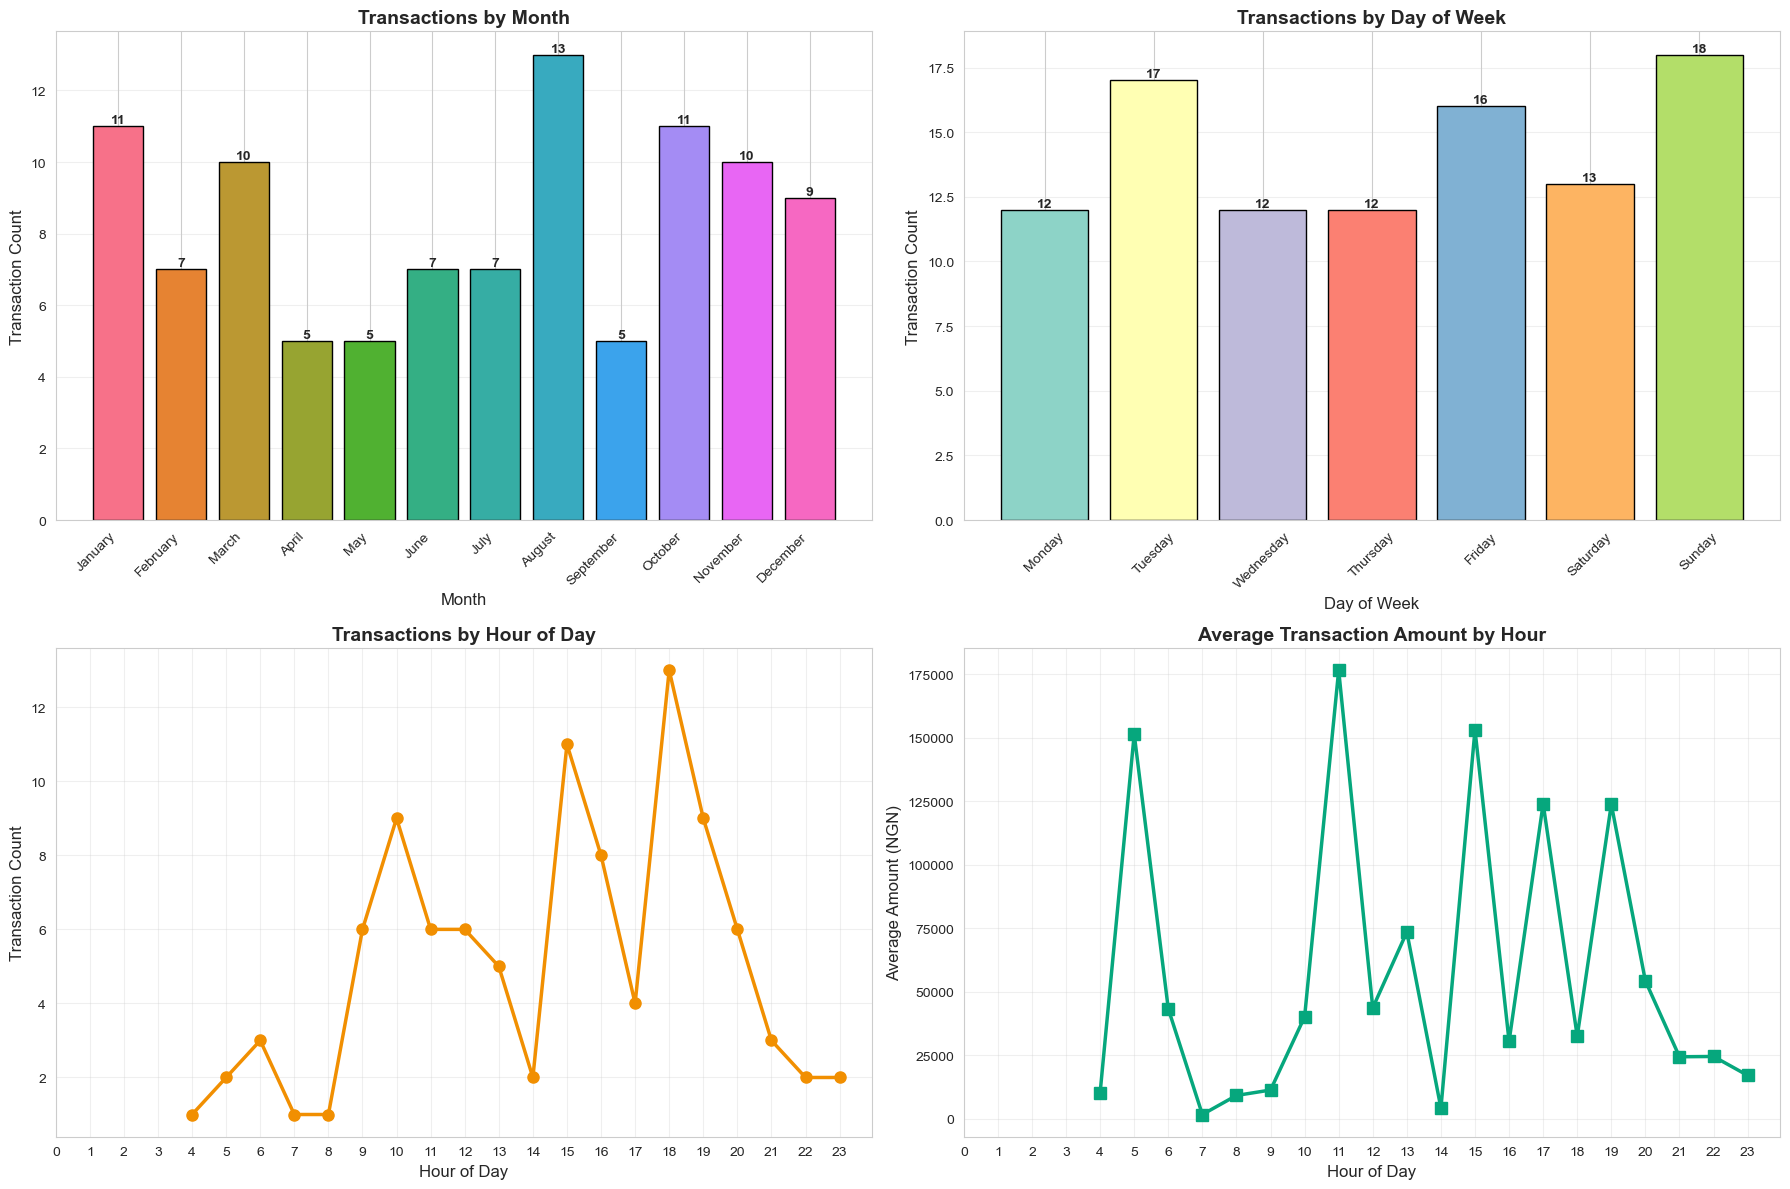


Temporal Insights:
Busiest month: August (13 transactions)
Busiest day: Sunday (18 transactions)
Peak hour: 18:00 (13 transactions)
Highest avg amount hour: 11:00 (₦176,533.33)


In [13]:
# Monthly distribution
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Transactions by month
monthly_counts = df['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], fill_value=0)

colors_month = sns.color_palette("husl", len(monthly_counts[monthly_counts > 0]))
bars = axes[0, 0].bar(range(len(monthly_counts[monthly_counts > 0])), 
                       monthly_counts[monthly_counts > 0].values, 
                       color=colors_month, edgecolor='black')
axes[0, 0].set_xticks(range(len(monthly_counts[monthly_counts > 0])))
axes[0, 0].set_xticklabels(monthly_counts[monthly_counts > 0].index, rotation=45, ha='right')
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Transaction Count', fontsize=12)
axes[0, 0].set_title('Transactions by Month', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                     f'{int(height)}',
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Transactions by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order, fill_value=0)

colors_day = sns.color_palette("Set3", len(day_counts))
bars = axes[0, 1].bar(day_counts.index, day_counts.values, color=colors_day, edgecolor='black')
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Transaction Count', fontsize=12)
axes[0, 1].set_title('Transactions by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    if height > 0:
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height)}',
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

# Transactions by hour
hourly_counts = df['hour'].value_counts().sort_index()
axes[1, 0].plot(hourly_counts.index, hourly_counts.values, marker='o', 
                linestyle='-', color='#F18F01', linewidth=2.5, markersize=8)
axes[1, 0].set_xlabel('Hour of Day', fontsize=12)
axes[1, 0].set_ylabel('Transaction Count', fontsize=12)
axes[1, 0].set_title('Transactions by Hour of Day', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].grid(alpha=0.3)

# Average transaction amount by hour
hourly_avg = df.groupby('hour')['amount_ngn'].mean()
axes[1, 1].plot(hourly_avg.index, hourly_avg.values, marker='s', 
                linestyle='-', color='#06A77D', linewidth=2.5, markersize=8)
axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
axes[1, 1].set_ylabel('Average Amount (NGN)', fontsize=12)
axes[1, 1].set_title('Average Transaction Amount by Hour', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTemporal Insights:")
print("=" * 60)
print(f"Busiest month: {monthly_counts.idxmax()} ({monthly_counts.max()} transactions)")
print(f"Busiest day: {day_counts.idxmax()} ({day_counts.max()} transactions)")
print(f"Peak hour: {hourly_counts.idxmax()}:00 ({hourly_counts.max()} transactions)")
print(f"Highest avg amount hour: {hourly_avg.idxmax()}:00 (₦{hourly_avg.max():,.2f})")

**Explanation:**
- **Monthly patterns** may reveal seasonal trends or business cycles
- **Day of week analysis** helps identify weekday vs weekend shopping behaviors
- **Hourly patterns** show when customers are most active, useful for:
  - Staffing decisions
  - System maintenance scheduling
  - Targeted marketing campaigns
  - Peak load planning for infrastructure

### 4.8 Fraud Analysis

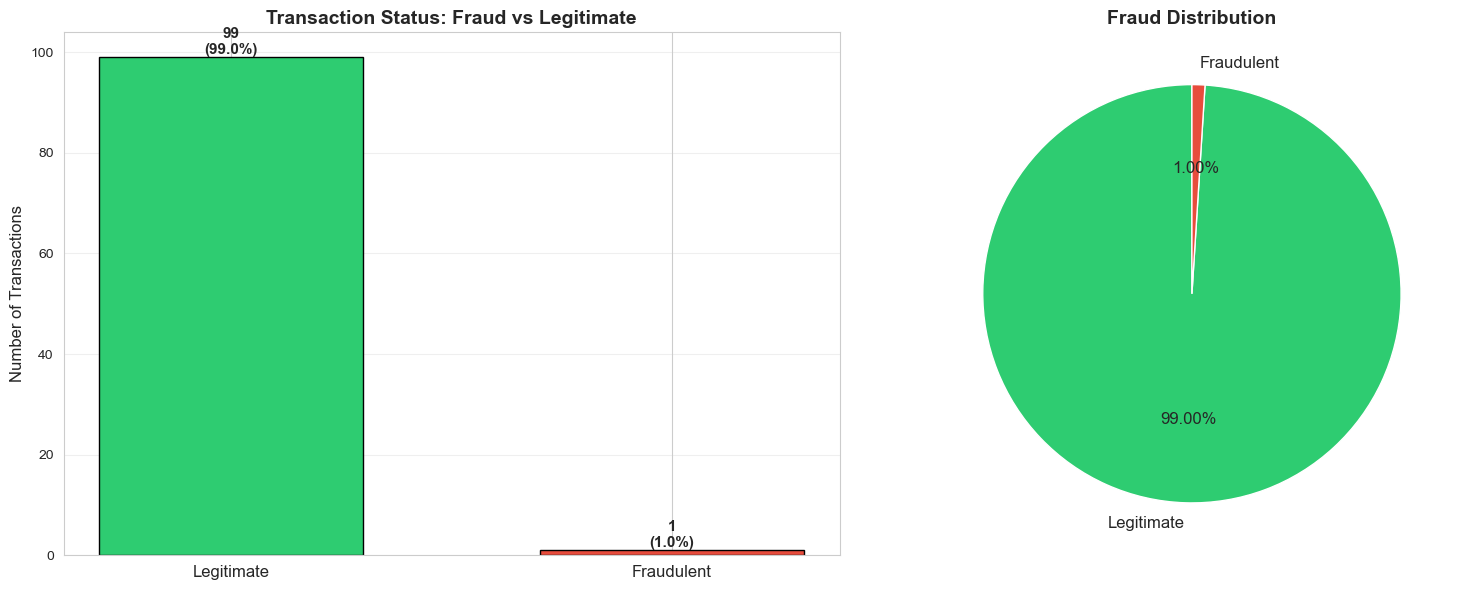


Fraud Statistics:
Total transactions: 100
Fraudulent transactions: 1
Fraud rate: 1.00%

Average fraudulent transaction amount: ₦7,500.00
Average legitimate transaction amount: ₦70,794.95


Fraud by Channel:
channel
branch    1
dtype: int64


In [14]:
# Fraud flag distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fraud_counts = df['fraud_flag'].value_counts()
colors = ['#2ECC71', '#E74C3C']
labels = ['Legitimate', 'Fraudulent']

# Bar chart
axes[0].bar(range(len(fraud_counts)), fraud_counts.values, 
            color=colors, edgecolor='black', width=0.6)
axes[0].set_xticks(range(len(fraud_counts)))
axes[0].set_xticklabels(labels, fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].set_title('Transaction Status: Fraud vs Legitimate', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(fraud_counts.values, labels=labels, autopct='%1.2f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Fraud Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Fraud statistics
print("\nFraud Statistics:")
print("=" * 60)
print(f"Total transactions: {len(df):,}")
print(f"Fraudulent transactions: {df['fraud_flag'].sum():,}")
print(f"Fraud rate: {(df['fraud_flag'].sum() / len(df)) * 100:.2f}%")

if df['fraud_flag'].sum() > 0:
    print(f"\nAverage fraudulent transaction amount: ₦{df[df['fraud_flag']]['amount_ngn'].mean():,.2f}")
    print(f"Average legitimate transaction amount: ₦{df[~df['fraud_flag']]['amount_ngn'].mean():,.2f}")
    
    # Fraud by channel
    print("\n\nFraud by Channel:")
    print("=" * 60)
    fraud_by_channel = df[df['fraud_flag']].groupby('channel').size()
    print(fraud_by_channel)
else:
    print("\n✓ No fraudulent transactions detected in this dataset!")

**Explanation:**
- Shows the proportion of fraudulent vs legitimate transactions
- A low fraud rate indicates effective security measures
- Understanding fraud patterns by channel helps:
  - Strengthen security for vulnerable channels
  - Implement targeted fraud detection algorithms
  - Reduce financial losses and protect customers

### 4.9 Account Balance Analysis

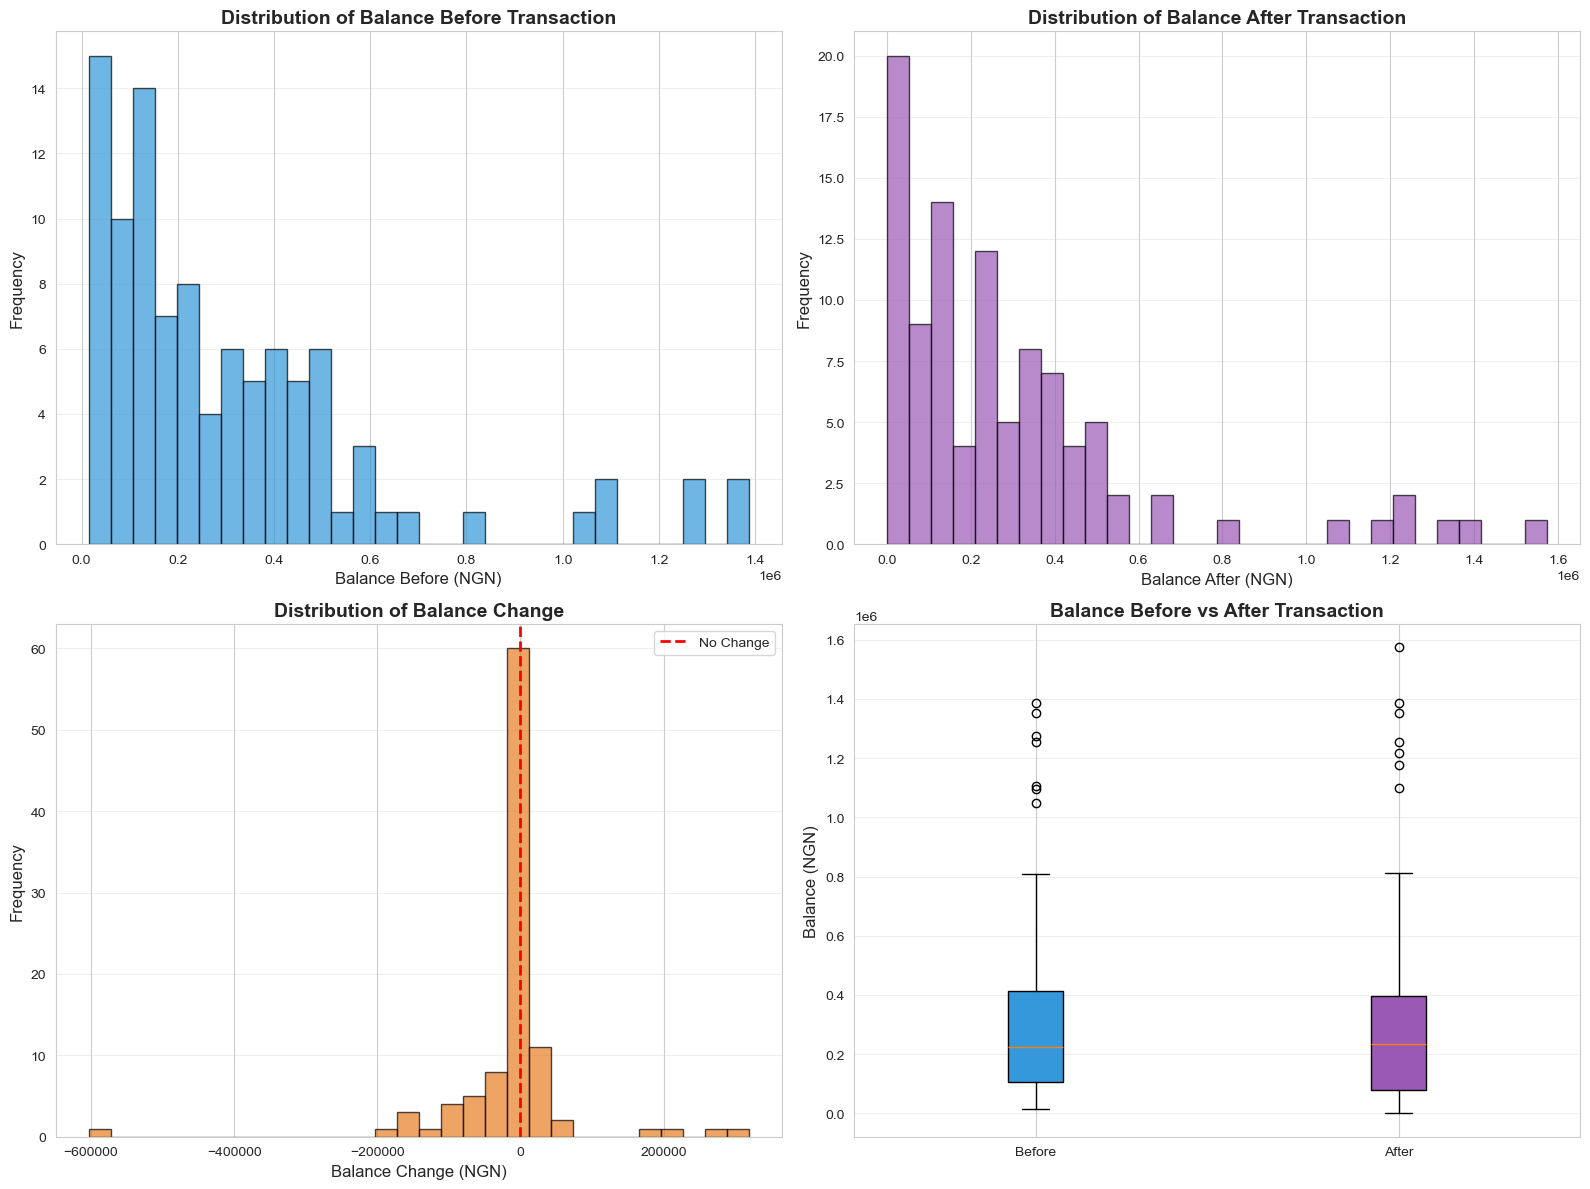


Balance Statistics:
Average balance before: ₦313,287.77
Average balance after: ₦301,392.27
Median balance before: ₦225,692.83
Median balance after: ₦234,502.24


In [15]:
# Balance distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Balance before transaction
axes[0, 0].hist(df['balance_before_ngn'], bins=30, color='#3498DB', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Balance Before (NGN)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Balance Before Transaction', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

# Balance after transaction
axes[0, 1].hist(df['balance_after_ngn'], bins=30, color='#9B59B6', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Balance After (NGN)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Balance After Transaction', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# Balance change
df['balance_change'] = df['balance_after_ngn'] - df['balance_before_ngn']
axes[1, 0].hist(df['balance_change'], bins=30, color='#E67E22', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Balance Change (NGN)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Balance Change', fontsize=14, fontweight='bold')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Change')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# Box plots comparison
balance_data = [df['balance_before_ngn'], df['balance_after_ngn']]
box = axes[1, 1].boxplot(balance_data, labels=['Before', 'After'], patch_artist=True)
for patch, color in zip(box['boxes'], ['#3498DB', '#9B59B6']):
    patch.set_facecolor(color)
axes[1, 1].set_ylabel('Balance (NGN)', fontsize=12)
axes[1, 1].set_title('Balance Before vs After Transaction', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nBalance Statistics:")
print("=" * 60)
print(f"Average balance before: ₦{df['balance_before_ngn'].mean():,.2f}")
print(f"Average balance after: ₦{df['balance_after_ngn'].mean():,.2f}")
print(f"Median balance before: ₦{df['balance_before_ngn'].median():,.2f}")
print(f"Median balance after: ₦{df['balance_after_ngn'].median():,.2f}")

**Explanation:**
- Balance analysis reveals customer financial health and account activity
- Understanding balance distributions helps:
  - Identify high-value customers
  - Detect unusual account behavior
  - Tailor financial products and credit offerings
  - Assess customer liquidity and spending capacity

### 4.10 Merchant Category Code Analysis

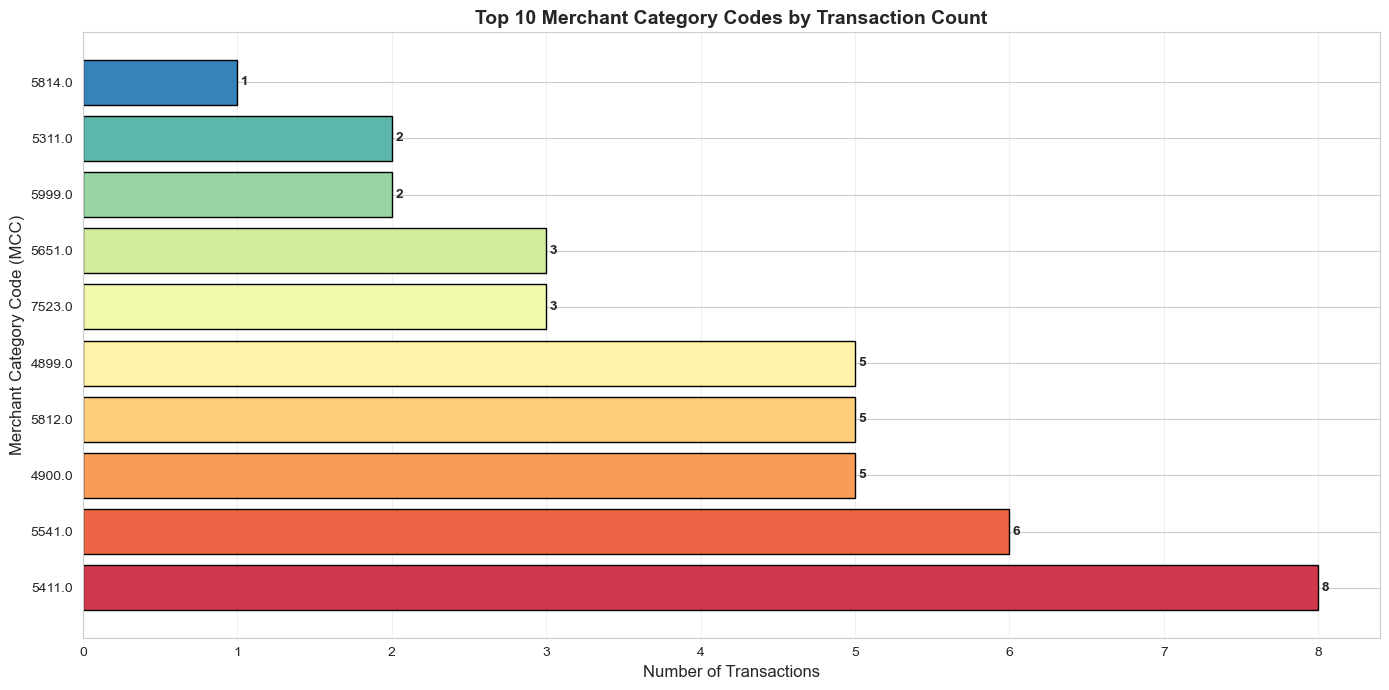


Top 10 Merchant Category Codes:
merchant_category_code
5,411.00    8
5,541.00    6
4,900.00    5
5,812.00    5
4,899.00    5
7,523.00    3
5,651.00    3
5,999.00    2
5,311.00    2
5,814.00    1
Name: count, dtype: int64


Average Transaction Amount by MCC:
MCC 5812: ₦180,980.00
MCC 5541: ₦89,616.67
MCC 4900: ₦54,120.00
MCC 5411: ₦49,750.00
MCC 5814: ₦24,700.00
MCC 4899: ₦22,580.00
MCC 5999: ₦19,500.00
MCC 7523: ₦14,466.67
MCC 5311: ₦10,000.00
MCC 5499: ₦8,200.00


In [16]:
# Merchant Category Code distribution
plt.figure(figsize=(14, 7))

# Filter out NaN values and get top categories
mcc_counts = df['merchant_category_code'].dropna().value_counts().head(10)

if len(mcc_counts) > 0:
    colors = sns.color_palette("Spectral", len(mcc_counts))
    bars = plt.barh(mcc_counts.index.astype(str), mcc_counts.values, color=colors, edgecolor='black')
    plt.xlabel('Number of Transactions', fontsize=12)
    plt.ylabel('Merchant Category Code (MCC)', fontsize=12)
    plt.title('Top 10 Merchant Category Codes by Transaction Count', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3, axis='x')
    
    # Add value labels
    for bar, value in zip(bars, mcc_counts.values):
        plt.text(value, bar.get_y() + bar.get_height()/2,
                 f' {value:,}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Merchant Category Codes:")
    print("=" * 60)
    print(mcc_counts)
    
    # Average transaction amount by MCC
    print("\n\nAverage Transaction Amount by MCC:")
    print("=" * 60)
    mcc_avg = df[df['merchant_category_code'].notna()].groupby('merchant_category_code')['amount_ngn'].mean().sort_values(ascending=False).head(10)
    for mcc, avg in mcc_avg.items():
        print(f"MCC {int(mcc)}: ₦{avg:,.2f}")
else:
    print("Insufficient merchant category code data available")

**Explanation:**
- Merchant Category Codes (MCCs) classify merchants by business type (e.g., 5541 for fuel stations, 4900 for utilities)
- Understanding MCC distribution reveals:
  - Which industries dominate transaction activity
  - Customer spending priorities (necessities vs discretionary)
  - Potential partnerships for merchant acquisition
- Higher average amounts in certain MCCs may indicate premium services or bulk purchases

### 4.11 Correlation Analysis

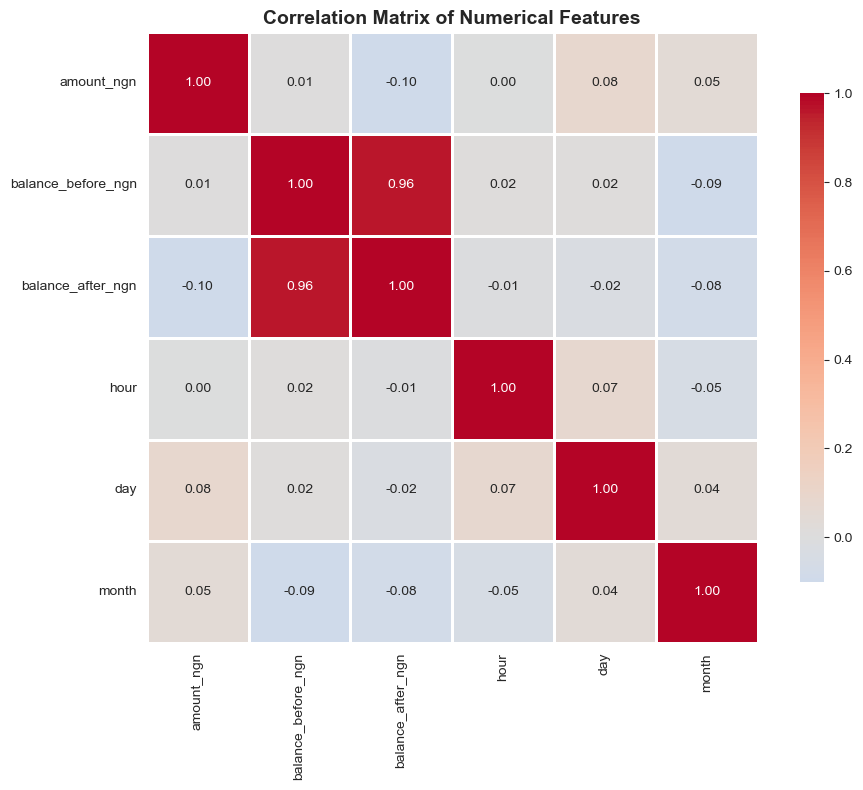


Key Correlations:
balance_before_ngn <-> balance_after_ngn: 0.96


In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))

# Select numerical columns for correlation
numerical_cols = ['amount_ngn', 'balance_before_ngn', 'balance_after_ngn', 'hour', 'day', 'month']
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print("=" * 60)
# Find strong correlations (excluding diagonal)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:  # Strong correlation threshold
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_value:.2f}")

**Explanation:**
- Correlation analysis identifies relationships between numerical variables
- Strong positive correlations indicate variables that move together
- Strong negative correlations indicate inverse relationships
- This helps in:
  - Feature selection for predictive modeling
  - Understanding business dynamics
  - Identifying redundant features

### 4.12 Transaction Status Analysis

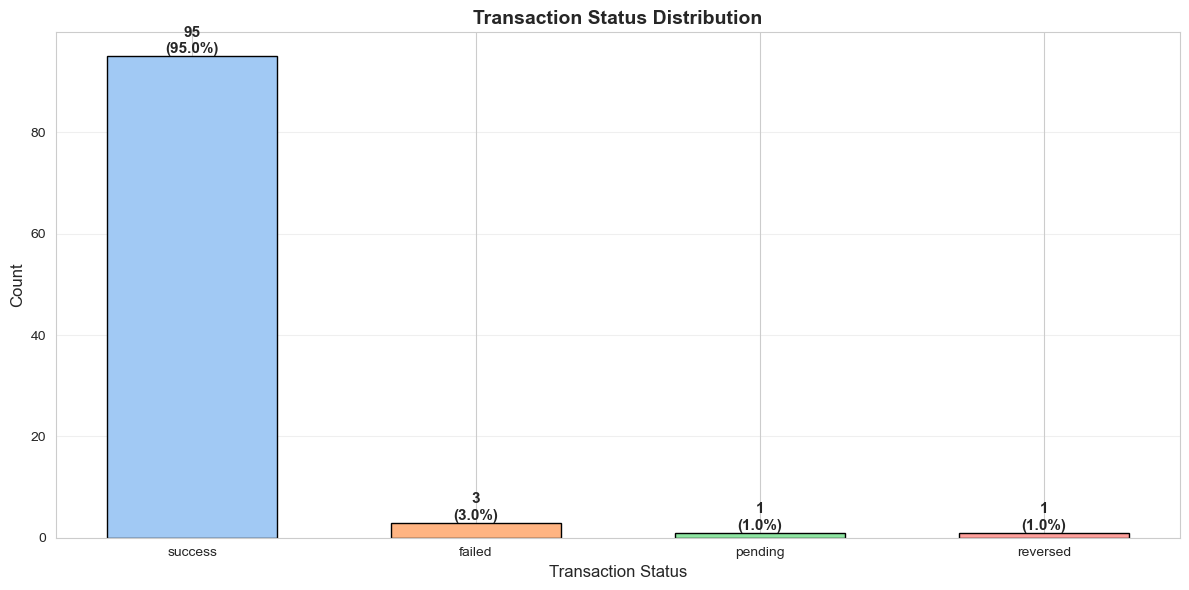


Transaction Status Summary:
SUCCESS: 95 transactions (95.00%)
FAILED: 3 transactions (3.00%)
PENDING: 1 transactions (1.00%)
REVERSED: 1 transactions (1.00%)


Failed Transaction Analysis:
Average failed transaction amount: ₦19,880.00

Failed transactions by channel:
channel
mobile    3
pos       2
Name: count, dtype: int64


In [18]:
# Transaction status distribution
plt.figure(figsize=(12, 6))

status_counts = df['status'].value_counts()
colors_status = sns.color_palette("pastel", len(status_counts))

bars = plt.bar(status_counts.index, status_counts.values, color=colors_status, edgecolor='black', width=0.6)
plt.xlabel('Transaction Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Transaction Status Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTransaction Status Summary:")
print("=" * 60)
for status, count in status_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{status.upper()}: {count:,} transactions ({percentage:.2f}%)")

# If there are failed transactions, analyze them
if len(status_counts) > 1:
    print("\n\nFailed Transaction Analysis:")
    print("=" * 60)
    failed_df = df[df['status'] != 'success']
    if len(failed_df) > 0:
        print(f"Average failed transaction amount: ₦{failed_df['amount_ngn'].mean():,.2f}")
        print("\nFailed transactions by channel:")
        print(failed_df['channel'].value_counts())

**Explanation:**
- Transaction status shows the success rate of the payment system
- High success rates indicate:
  - Reliable infrastructure
  - Good user experience
  - Minimal technical issues
- Analyzing failed transactions helps identify and fix system bottlenecks

### 4.13 Customer Spending Behavior

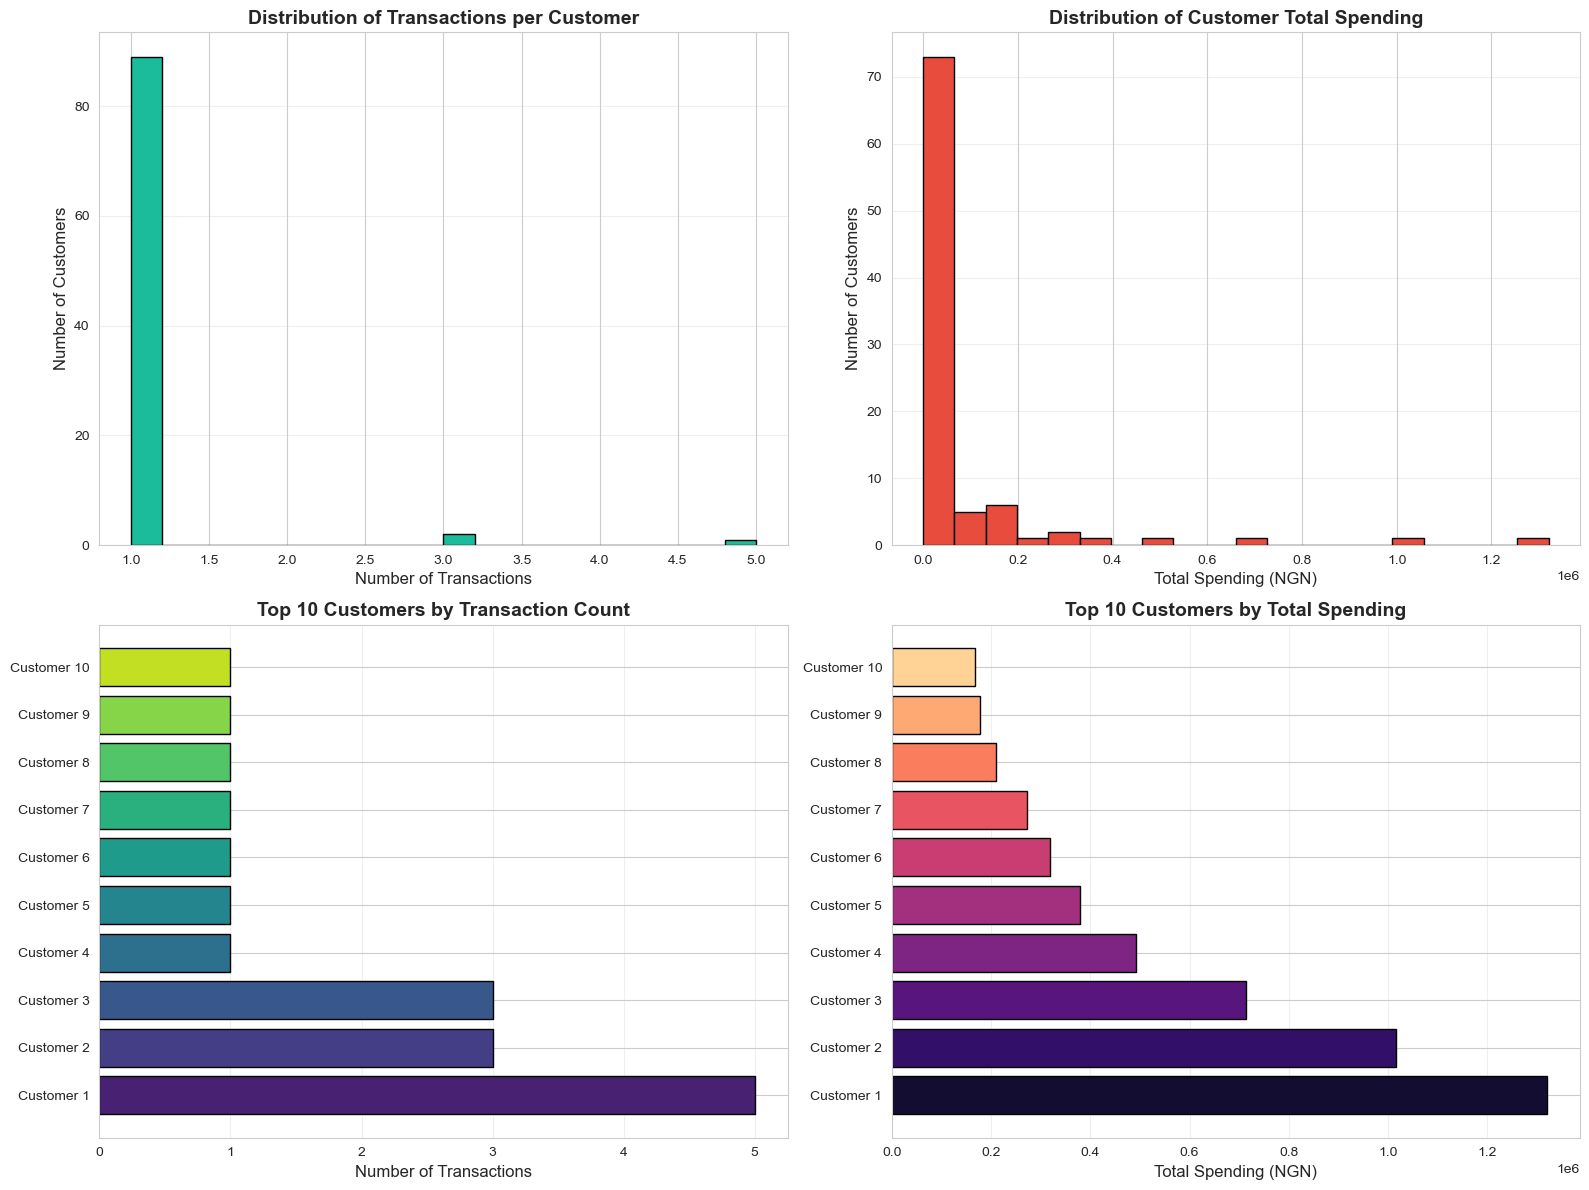


Customer Behavior Insights:
Average transactions per customer: 1.09
Average spending per customer: ₦76,263.04
Most active customer: 5 transactions
Highest spending customer: ₦1,321,000.00


In [19]:
# Customer transaction patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Transactions per customer
customer_trans_count = df.groupby('customer_id').size()
axes[0, 0].hist(customer_trans_count, bins=20, color='#1ABC9C', edgecolor='black')
axes[0, 0].set_xlabel('Number of Transactions', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].set_title('Distribution of Transactions per Customer', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

# Total spending per customer
customer_spending = df.groupby('customer_id')['amount_ngn'].sum()
axes[0, 1].hist(customer_spending, bins=20, color='#E74C3C', edgecolor='black')
axes[0, 1].set_xlabel('Total Spending (NGN)', fontsize=12)
axes[0, 1].set_ylabel('Number of Customers', fontsize=12)
axes[0, 1].set_title('Distribution of Customer Total Spending', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# Top 10 customers by transaction count
top_customers_count = customer_trans_count.nlargest(10)
axes[1, 0].barh(range(len(top_customers_count)), top_customers_count.values, 
                color=sns.color_palette("viridis", len(top_customers_count)), edgecolor='black')
axes[1, 0].set_yticks(range(len(top_customers_count)))
axes[1, 0].set_yticklabels([f'Customer {i+1}' for i in range(len(top_customers_count))])
axes[1, 0].set_xlabel('Number of Transactions', fontsize=12)
axes[1, 0].set_title('Top 10 Customers by Transaction Count', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='x')

# Top 10 customers by spending
top_customers_spend = customer_spending.nlargest(10)
axes[1, 1].barh(range(len(top_customers_spend)), top_customers_spend.values, 
                color=sns.color_palette("magma", len(top_customers_spend)), edgecolor='black')
axes[1, 1].set_yticks(range(len(top_customers_spend)))
axes[1, 1].set_yticklabels([f'Customer {i+1}' for i in range(len(top_customers_spend))])
axes[1, 1].set_xlabel('Total Spending (NGN)', fontsize=12)
axes[1, 1].set_title('Top 10 Customers by Total Spending', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nCustomer Behavior Insights:")
print("=" * 60)
print(f"Average transactions per customer: {customer_trans_count.mean():.2f}")
print(f"Average spending per customer: ₦{customer_spending.mean():,.2f}")
print(f"Most active customer: {customer_trans_count.max()} transactions")
print(f"Highest spending customer: ₦{customer_spending.max():,.2f}")

**Explanation:**
- Customer behavior analysis identifies valuable patterns:
  - **High-frequency users**: Customers with many transactions may be loyal or dependent on the service
  - **High-value customers**: Those with large total spending are key revenue generators
  - **Customer segmentation**: Understanding spending distributions helps tailor services and marketing
- This analysis is crucial for:
  - Customer retention strategies
  - Loyalty program design
  - Personalized marketing campaigns
  - Credit limit decisions

## 5. Key Insights and Recommendations

In [22]:
print("=" * 80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Transactions: {len(df):,}")
print(f"   • Date Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"   • Unique Customers: {df['customer_id'].nunique():,}")
print(f"   • Geographic Coverage: {df['location_state'].nunique()} states, {df['location_lga'].nunique()} LGAs")

print("\n💰 TRANSACTION METRICS:")
print(f"   • Total Transaction Volume: ₦{df['amount_ngn'].sum():,.2f}")
print(f"   • Average Transaction: ₦{df['amount_ngn'].mean():,.2f}")
print(f"   • Median Transaction: ₦{df['amount_ngn'].median():,.2f}")
print(f"   • Largest Transaction: ₦{df['amount_ngn'].max():,.2f}")

print("\n📱 CHANNEL DISTRIBUTION:")
for channel, count in df['channel'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"   • {channel.upper()}: {percentage:.1f}%")

print("\n🏦 TRANSACTION TYPES:")
for trans_type, count in df['transaction_type'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"   • {trans_type.capitalize()}: {percentage:.1f}%")

print("\n📍 TOP 3 STATES:")
for i, (state, count) in enumerate(df['location_state'].value_counts().head(3).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"   {i}. {state}: {count:,} transactions ({percentage:.1f}%)")

print("\n🔒 SECURITY METRICS:")
fraud_rate = (df['fraud_flag'].sum() / len(df)) * 100
success_rate = (df['status'].value_counts().get('success', 0) / len(df)) * 100
print(f"   • Fraud Rate: {fraud_rate:.2f}%")
print(f"   • Success Rate: {success_rate:.2f}%")

print("\n👥 CUSTOMER INSIGHTS:")
customer_trans = df.groupby('customer_id').size()
customer_spend = df.groupby('customer_id')['amount_ngn'].sum()
print(f"   • Avg Transactions per Customer: {customer_trans.mean():.2f}")
print(f"   • Avg Spending per Customer: ₦{customer_spend.mean():,.2f}")
print(f"   • Most Active Customer: {customer_trans.max()} transactions")

print("\n⏰ TEMPORAL PATTERNS:")
peak_hour = df['hour'].value_counts().idxmax()
peak_day = df['day_of_week'].value_counts().idxmax()
if df['month_name'].value_counts().shape[0] > 0:
    peak_month = df['month_name'].value_counts().idxmax()
    print(f"   • Peak Hour: {peak_hour}:00")
    print(f"   • Busiest Day: {peak_day}")
    print(f"   • Peak Month: {peak_month}")

print("\n" + "=" * 80)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total Transactions: 100
   • Date Range: 2023-01-06 to 2024-12-25
   • Unique Customers: 92
   • Geographic Coverage: 25 states, 25 LGAs

💰 TRANSACTION METRICS:
   • Total Transaction Volume: ₦7,016,200.00
   • Average Transaction: ₦70,162.00
   • Median Transaction: ₦11,600.00
   • Largest Transaction: ₦1,321,000.00

📱 CHANNEL DISTRIBUTION:
   • MOBILE: 36.0%
   • POS: 32.0%
   • ATM: 12.0%
   • WEB: 10.0%
   • BRANCH: 7.0%
   • USSD: 3.0%

🏦 TRANSACTION TYPES:
   • Debit: 59.0%
   • Credit: 41.0%

📍 TOP 3 STATES:
   1. Lagos: 24 transactions (24.0%)
   2. Abuja (FCT): 12 transactions (12.0%)
   3. Oyo: 7 transactions (7.0%)

🔒 SECURITY METRICS:
   • Fraud Rate: 1.00%
   • Success Rate: 95.00%

👥 CUSTOMER INSIGHTS:
   • Avg Transactions per Customer: 1.09
   • Avg Spending per Customer: ₦76,263.04
   • Most Active Customer: 5 transactions

⏰ TEMPORAL PATTERNS:
   • Peak Hour: 18:00
   • Busiest Day: Sunday
   • Peak

### 5.1 Business Recommendations

In [23]:
print("=" * 80)
print("STRATEGIC RECOMMENDATIONS")
print("=" * 80)

print("\n🎯 1. CHANNEL OPTIMIZATION:")
top_channel = df['channel'].value_counts().index[0]
print(f"   • Invest in {top_channel.upper()} infrastructure - it's the dominant channel")
print(f"   • Develop mobile-first features to capture growing digital adoption")
print(f"   • Ensure ATM network reliability for cash-dependent regions")

print("\n📈 2. GEOGRAPHIC EXPANSION:")
top_state = df['location_state'].value_counts().index[0]
underserved_states = df['location_state'].value_counts().tail(3).index.tolist()
print(f"   • Strengthen presence in {top_state} (highest activity)")
print(f"   • Explore growth opportunities in underrepresented states")
print(f"   • Deploy targeted marketing in emerging markets")

print("\n🕐 3. OPERATIONAL EFFICIENCY:")
hourly_counts = df['hour'].value_counts().sort_index()
peak_hours = hourly_counts.nlargest(3).index.tolist()
print(f"   • Scale infrastructure during peak hours: {', '.join([f'{h}:00' for h in peak_hours])}")
print(f"   • Schedule system maintenance during low-activity periods")
print(f"   • Optimize staffing based on temporal patterns")

print("\n💳 4. MERCHANT PARTNERSHIPS:")
if df['merchant_name'].notna().sum() > 0:
    top_merchants = df['merchant_name'].value_counts().head(3).index.tolist()
    print(f"   • Strengthen relationships with top merchants: {', '.join(top_merchants[:2])}")
    print(f"   • Expand merchant categories in high-demand sectors")
    print(f"   • Offer incentives for merchant acquisition in new verticals")

print("\n🔐 5. FRAUD PREVENTION:")
if df['fraud_flag'].sum() > 0:
    fraud_rate = (df['fraud_flag'].sum() / len(df)) * 100
    print(f"   • Current fraud rate: {fraud_rate:.2f}% - Implement advanced ML detection")
    print(f"   • Monitor high-value transactions more closely")
    print(f"   • Enhance authentication for vulnerable channels")
else:
    print(f"   • Maintain current security protocols - 0% fraud rate")
    print(f"   • Continue monitoring for emerging fraud patterns")
    print(f"   • Regular security audits and updates")

print("\n👥 6. CUSTOMER ENGAGEMENT:")
avg_trans_per_customer = df.groupby('customer_id').size().mean()
print(f"   • Launch loyalty programs for high-frequency users")
print(f"   • Personalize offers based on spending patterns")
print(f"   • Re-engage inactive customers with targeted campaigns")
print(f"   • Create tiered benefits for different customer segments")

print("\n📊 7. DATA-DRIVEN DECISIONS:")
print(f"   • Implement real-time analytics dashboards")
print(f"   • Build predictive models for transaction forecasting")
print(f"   • Use customer segmentation for targeted product development")
print(f"   • Monitor KPIs: success rate, avg transaction value, customer lifetime value")

print("\n" + "=" * 80)

STRATEGIC RECOMMENDATIONS

🎯 1. CHANNEL OPTIMIZATION:
   • Invest in MOBILE infrastructure - it's the dominant channel
   • Develop mobile-first features to capture growing digital adoption
   • Ensure ATM network reliability for cash-dependent regions

📈 2. GEOGRAPHIC EXPANSION:
   • Strengthen presence in Lagos (highest activity)
   • Explore growth opportunities in underrepresented states
   • Deploy targeted marketing in emerging markets

🕐 3. OPERATIONAL EFFICIENCY:
   • Scale infrastructure during peak hours: 18:00, 15:00, 10:00
   • Schedule system maintenance during low-activity periods
   • Optimize staffing based on temporal patterns

💳 4. MERCHANT PARTNERSHIPS:
   • Strengthen relationships with top merchants: Total, Grand Square
   • Expand merchant categories in high-demand sectors
   • Offer incentives for merchant acquisition in new verticals

🔐 5. FRAUD PREVENTION:
   • Current fraud rate: 1.00% - Implement advanced ML detection
   • Monitor high-value transactions more

## 6. Conclusion

This comprehensive exploratory data analysis of Nigerian retail and POS transaction data has revealed valuable insights into customer behavior, transaction patterns, and operational efficiency. 

### Key Takeaways:

1. **Transaction Landscape**: The dataset captures a diverse range of transactions across multiple channels, showcasing Nigeria's evolving digital payment ecosystem.

2. **Geographic Concentration**: Transaction activity is concentrated in major commercial hubs, presenting opportunities for expansion into underserved regions.

3. **Channel Preferences**: Understanding which channels dominate helps optimize infrastructure investments and user experience.

4. **Temporal Patterns**: Clear hourly, daily, and monthly patterns provide opportunities for operational optimization and targeted marketing.

5. **Security Posture**: The current fraud detection and prevention mechanisms appear effective, but continuous monitoring remains essential.

6. **Customer Segmentation**: Varied customer behavior patterns suggest opportunities for personalized services and tiered product offerings.

### Next Steps:

- **Predictive Modeling**: Build models for transaction forecasting, fraud detection, and customer churn prediction
- **Customer Segmentation**: Apply clustering algorithms to identify distinct customer groups
- **Time Series Analysis**: Deeper investigation of seasonal trends and anomaly detection
- **A/B Testing Framework**: Implement experiments to optimize conversion rates and customer satisfaction
- **Real-time Monitoring**: Deploy dashboards for continuous business intelligence

---

**Analysis completed successfully! The insights derived from this EDA provide a solid foundation for data-driven decision-making and strategic planning.**